# Import Dependencies and data 
#### Read the data using pandas 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)


# Merge all the different seasons 

In [2]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df2 = pd.concat(frames)
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()


# Create Point Differntial Column 

#### Use the Point Differntial Column later on for ease when needed for finding the winner 


In [3]:
# Create point differential column 
p_dif = []

# Iterate through table and calculate point dif and insert into list 
for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)

# Add point dif column and data         
df['Point Dif'] = p_dif
df.reset_index()



,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif
0,0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1
1,1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1
2,2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1
3,3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1
4,4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335,2711,606,10,H,Boston,0,0,1,1,-155,-160,-1.5,176.0,5.5,-110,5.5,-135,-1
13336,2712,609,11,V,Boston,1,0,4,5,100,105,1.5,-280.0,5.0,-110,5.0,-150,4
13337,2713,609,12,H,St.Louis,0,0,1,1,-120,-115,-1.5,230.0,5.0,-110,5.0,130,-4
13338,2714,612,13,V,St.Louis,2,0,2,4,151,155,1.5,-183.0,5.5,-110,5.0,-120,3


#  Create Favored team table 

#### Create favored team and add the result column to the favored team table 

In [4]:
# Create favored team table
fav = []

# Iterate through the table and see which team had the lower number in closing (Favored to win)
for i in range(1,df.shape[0], 2):
    if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
        fav.append(df.iloc[i])
    else:
        fav.append(df.iloc[i-1])

# Create new table with just the favored team in it
favored_df = pd.DataFrame(fav)
favored_df

# Create row to see who won or loss by checking the point diferential was positive or negative.
def set_winner(row):
    if row['Point Dif'] > 0:
        return 'Won'
    else:
        return 'Loss'

# add the result column 
favored_df = favored_df.assign(Result=favored_df.apply(set_winner, axis=1)) 
favored_df

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point Dif,Result
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,Loss
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,Won
5,1008,6,H,LosAngeles,0,0,0,0,-121,-150,-1.5,200.0,5.5,-147,5.0,116,-4,Loss
6,1008,7,V,Vancouver,1,2,1,4,-131,-126,-1.5,230.0,5.5,123,5.0,-140,2,Won
9,1009,52,H,Washington,1,0,0,1,-135,-145,-1.5,205.0,5.5,-115,5.5,-135,-1,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,601,6,H,St.Louis,0,1,1,2,-130,-115,-1.5,236.0,5.0,-110,5.0,130,-5,Loss
2709,603,8,H,St.Louis,2,0,2,4,-110,-108,-1.5,234.0,5.5,-110,5.5,-150,2,Won
2711,606,10,H,Boston,0,0,1,1,-155,-160,-1.5,176.0,5.5,-110,5.5,-135,-1,Loss
2713,609,12,H,St.Louis,0,0,1,1,-120,-115,-1.5,230.0,5.0,-110,5.0,130,-4,Loss


# Create Bar Graph to show WL ratio of the favored team 

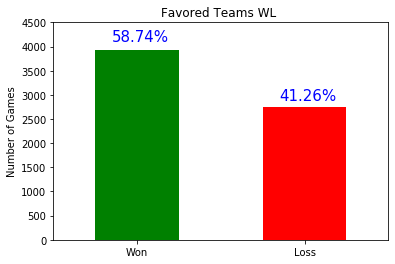

In [5]:
# Use this to check and make sure the counts are right 
# favored_df['Result'].value_counts()

# Created Bar graph with the win and loss results of the favored team in the match up
ax = favored_df['Result'].value_counts().plot(kind='bar', rot=0, color=['Green', 'Red'])
total = len(favored_df['Result'])
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height() * 1.05, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='Blue')
plt.ylabel('Number of Games')
plt.title('Favored Teams WL ')
plt.ylim(0,4500)
plt.show()



# Create table for the Home and Away favored team WL 

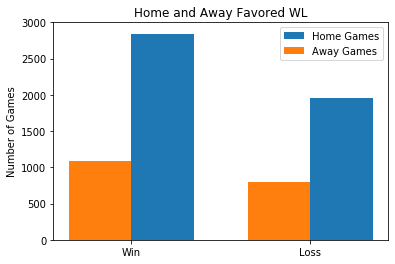

In [6]:
# Create table for the Home and Away favored team 
home_fav = favored_df[favored_df['VH'] == 'H']
away_fav = favored_df[favored_df['VH'] == 'V']

# Create two bar charts seperated by width to have them side by side. 
index = np.arange(2)
width = 0.35
plt.bar(index + width,home_fav['Result'].value_counts(), width = 0.35, label='Home Games')
plt.bar(index, away_fav['Result'].value_counts(),width = 0.35, label='Away Games')
plt.ylabel('Number of Games')
plt.title('Home and Away Favored WL')
plt.xticks(index + width / 2 , ('Win','Loss'))
plt.legend(loc='best')
plt.ylim(0,3000)
plt.show()

# Take off the comment to see the values. 
# home_fav['Result'].value_counts()
# away_fav['Result'].value_counts()

# Test / Stuff to use for further analysis 

In [ ]:
# # winner = df['Point Dif'] > 0 
# # loser = df['Point Dif'] < 0 
# # win = df[winner]
# # win.loc[win['VH'] == 'H']


# # x = df.reset_index()


# # g = x[x['Puck Line'] > 1.5].index
# # l = x[x['Puck Line'] < -1.5].index


# # x1 = x.drop(g | l)
# # # x1['Puck Line'].value_counts()
# # w = x1['Point Dif'] > 0 
# # l = x1['Point Dif'] < 0




# # w1 = x1[w]
# # l1 = x1[l]
# # # plt.scatter(x1['Puck Line'],x1['Point Dif'])
# # # plt.scatter( x1[l]['Close'], x1[l]['Point Dif'] )

# # fav = x1['Close'] < 0
# # under = x1['Close'] > 0
# # len(w1[fav])
# # len(w1[under])
# # los = df[loser]
# # los.loc[los['VH'] == 'V']



# # Create favored team table 
# fav = []

# for i in range(1,df.shape[0], 2):
#     if (df['Close'].iloc[i] < df['Close'].iloc[i-1]):
#         fav.append(df.iloc[i])
#     else:
#         fav.append(df.iloc[i-1])

# fav
# fav_df = pd.DataFrame(fav)
# fav_df



# def set_winner(row):
#     if row['Point Dif'] > 0:
#         return 'Won'
#     else:
#         return 'Loss'
        
# new_df = fav_df.assign(Result=fav_df.apply(set_winner, axis=1)) 

# # winner = fav_df['Point Dif'] > 0 
# # loser = fav_df['Point Dif'] < 0 

# # favored_win = fav_df[winner]
# # favored_win
# # favored_win.assign(Result='Won')




# new_df['Result'].value_counts()
# win_loss = ['Won','Loss']
# plt.bar(win_loss,new_df['Result'].value_counts())


# Create bar chart to visualize the win loss ratio for the favored team 
# width = 0.35
# plt.bar(index,favored_df['Result'].value_counts(), color=('green','red'))
# plt.ylabel('Number of Games')
# plt.title('Favored Teams WL ')
# plt.xticks(index, ('Win','Loss'))
# favored_df['Result'].value_counts(1)

